In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

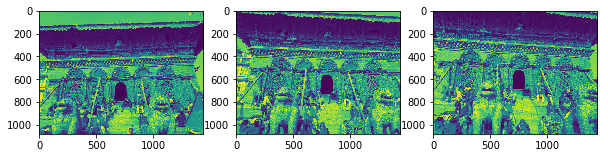

In [21]:
img1 = cv2.imread('reconstruct/1.jpg', 0)
img2 = cv2.imread('reconstruct/2.jpg', 0)
img3 = cv2.imread('reconstruct/3.jpg', 0)

figure = plt.figure(figsize=(10.0, 3.0))
plt.subplot(131)
plt.imshow(img1)

plt.subplot(132)
plt.imshow(img2)

plt.subplot(133)
plt.imshow(img3)

plt.show()

In [22]:
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

In [41]:
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)
kp2, des3 = sift.detectAndCompute(img3, None)

print("# kps: {}, descriptors: {}".format(len(kp1), des1.shape))

# kps: 16611, descriptors: (16611, 128)


In [63]:
# BFMatcher with default params
bf = cv2.BFMatcher()
matches12 = bf.knnMatch(des1, des2, k=2)

In [62]:
# Apply ratio test
good12 = []
for m,n in matches12:
    if m.distance > 0.75 * n.distance:
        good12.append([m])

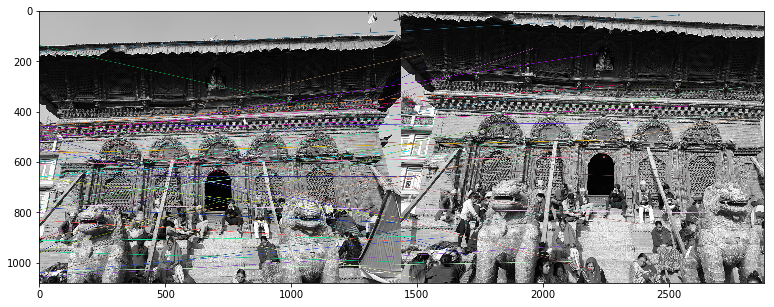

In [70]:
# cv2.drawMatchesKnn expects list of lists as matches.
img12 = cv2.drawMatchesKnn(img1,kp1, img2,kp2, good12[:50],None,flags=2)


figure = plt.figure(figsize=(20.0, 5.0))
plt.imshow(img12)
plt.show()

In [75]:
# Normalize points with K^{-1}
# (u v 1) = K^-1 * (u’ v’ 1)
# K is the calibration matrix in intrinsics.txt
# K = [1123.26 0      706.85]
#      0      1123.26 542.07]
#      0        0        1]

K = np.array([[1123.26, 0, 706.85],
            [0, 1123.26, 542.07],
            [0, 0, 1]])
K

array([[  1.12326000e+03,   0.00000000e+00,   7.06850000e+02],
       [  0.00000000e+00,   1.12326000e+03,   5.42070000e+02],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00]])

In [76]:
matches12.

[[<DMatch 0x7f0189a49fb0>, <DMatch 0x7f0189b30a50>],
 [<DMatch 0x7f0189884070>, <DMatch 0x7f0189884ef0>],
 [<DMatch 0x7f0189884f30>, <DMatch 0x7f0189884030>],
 [<DMatch 0x7f0189884fd0>, <DMatch 0x7f0189884f10>],
 [<DMatch 0x7f0189884f50>, <DMatch 0x7f0189884fb0>],
 [<DMatch 0x7f0189884f90>, <DMatch 0x7f0189884e30>],
 [<DMatch 0x7f01898846f0>, <DMatch 0x7f0189884e10>],
 [<DMatch 0x7f0189884e50>, <DMatch 0x7f0189884eb0>],
 [<DMatch 0x7f0189884e90>, <DMatch 0x7f01898842b0>],
 [<DMatch 0x7f0189884270>, <DMatch 0x7f01898842f0>],
 [<DMatch 0x7f0189884370>, <DMatch 0x7f01898840d0>],
 [<DMatch 0x7f0189884bb0>, <DMatch 0x7f0189884b70>],
 [<DMatch 0x7f0189884b90>, <DMatch 0x7f0189884bd0>],
 [<DMatch 0x7f0189884c30>, <DMatch 0x7f0189884c10>],
 [<DMatch 0x7f0189884ad0>, <DMatch 0x7f0189884a90>],
 [<DMatch 0x7f0189884ab0>, <DMatch 0x7f0189884af0>],
 [<DMatch 0x7f0189884b50>, <DMatch 0x7f0189884b30>],
 [<DMatch 0x7f0189884510>, <DMatch 0x7f01898844d0>],
 [<DMatch 0x7f0189884490>, <DMatch 0x7f0189884